## PAD - Project 1

In [38]:
# some librabries used for overall usage

import warnings
warnings.filterwarnings(action='ignore')


import statsmodels.api as sm
import scipy.stats as stats

import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

### Reading data
https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set

Ambient temperature (AT) C \
Ambient pressure (AP) mbar \
Ambient humidity (AH) (%) \
Air filter difference pressure (AFDP) mbar \
Gas turbine exhaust pressure (GTEP) mbar \
Turbine inlet temperature (TIT) C \
Turbine after temperature (TAT) C \
Compressor discharge pressure (CDP) mbar \
Turbine energy yield (TEY) MWH \
Carbon monoxide (CO) mg/m3 \
Nitrogen oxides (NOx) mg/m3 

In [2]:
raw_data_2011 = pd.read_csv('gt_2011.csv')
raw_data_2011.insert(11,'Year',[2011]*len(raw_data_2011))

raw_data_2012 = pd.read_csv('gt_2012.csv')
raw_data_2012.insert(11,'Year',[2012]*len(raw_data_2012))

raw_data_2013 = pd.read_csv('gt_2013.csv')
raw_data_2013.insert(11,'Year',[2013]*len(raw_data_2013))

raw_data_2014 = pd.read_csv('gt_2014.csv')
raw_data_2014.insert(11,'Year',[2014]*len(raw_data_2014))

raw_data_2015 = pd.read_csv('gt_2015.csv')
raw_data_2015.insert(11,'Year',[2015]*len(raw_data_2015))

In [3]:
raw_data = pd.concat([raw_data_2011,raw_data_2012,raw_data_2013,raw_data_2014,raw_data_2015],ignore_index=True)

In [4]:
raw_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,Year
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2011
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2011
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2011
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2011
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172,2015
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849,2015
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147,2015
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738,2015


### Data Visualization

<AxesSubplot:>

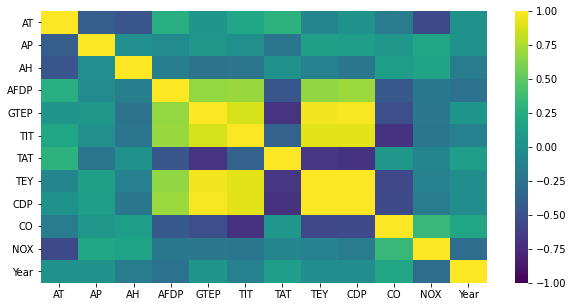

In [5]:
plt.figure(figsize=(10,5))

sns.heatmap(raw_data.corr(), cmap = 'viridis', vmin=-1, vmax=1)

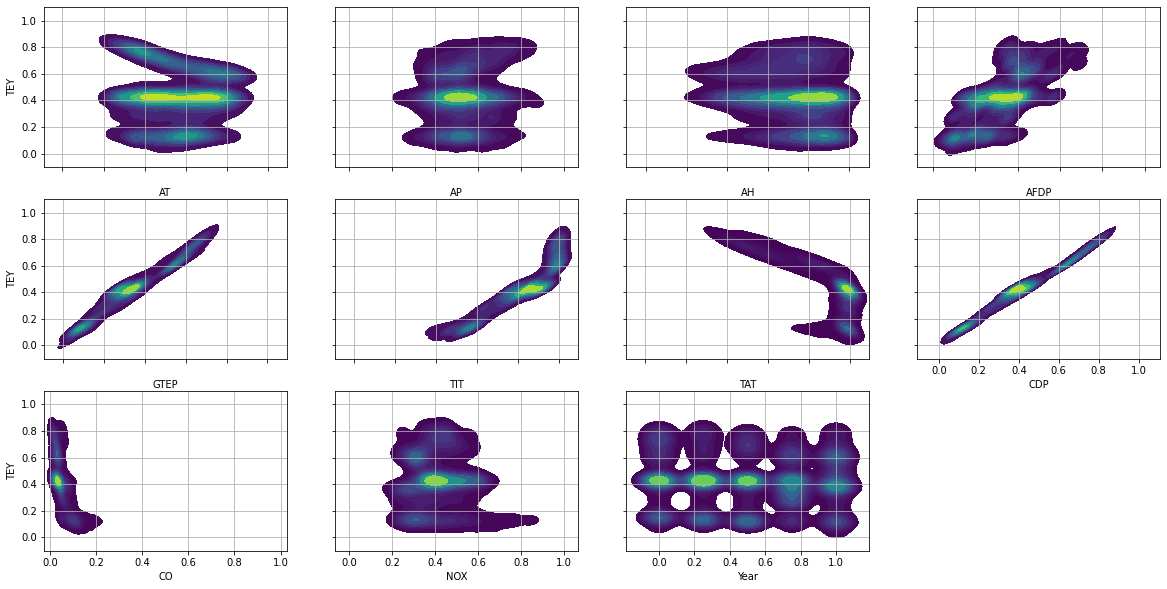

In [6]:
cols = raw_data.columns.delete(7)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(raw_data)
norm_data = pd.DataFrame(norm_data, columns= raw_data.columns)
plt.figure(figsize=(20,10))
for i in range(len(cols)):

    plt.subplot(3,4,i+1)
    sns.kdeplot(x = norm_data[cols[i]],y = norm_data['TEY'], fill=True, cmap='viridis')
    plt.xticks(ticks=[0.0,0.2,0.4,0.6,0.8,1.0])
    plt.grid(True)
    if i != 0 and i!= 4 and i!= 8:
        plt.ylabel('')
        plt.yticks(color ='white')

    if i < 7:
        plt.xticks(color = 'white')
        

Text(0, 0.5, 'Turbine energy yield (MWH)')

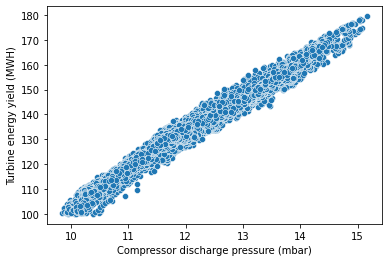

In [7]:
sns.scatterplot(raw_data['CDP'],raw_data['TEY'])
plt.xlabel('Compressor discharge pressure (mbar)')
plt.ylabel('Turbine energy yield (MWH)')
#cbar = plt.colorbar()
#cbar.set_label('Turbine energy yield (MWH)')


Text(0, 0.5, '')

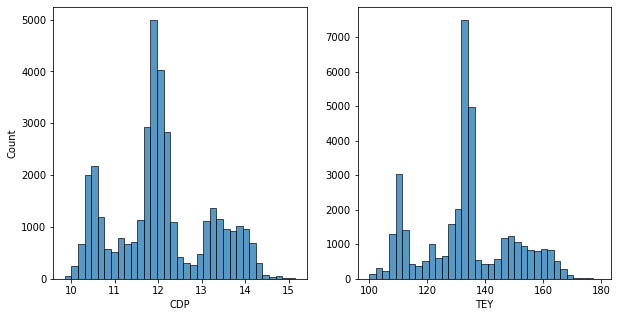

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(raw_data['CDP'],bins=35)
plt.subplot(1,2,2)
sns.histplot(raw_data['TEY'],bins=35)
plt.ylabel('')

# Regression Analysis

In [9]:
# Defining the variables that will be used y -> target, x -> variable to use to estimate the target
x = np.array(raw_data['CDP'].copy()); print('Initial shape of x:',x.shape)
y = np.array(raw_data['TEY'].copy()); print('Initial shape of y:',y.shape)

Initial shape of x: (36733,)
Initial shape of y: (36733,)


### Building a regression model with the normal variables

In [10]:
# using a built-in function from numpy polyfit, which does not require any change to data.
# X: vector or matrix to use to predict the target class.
# Y: target values / value that we want to predict.
# deg: Degree of the polynomial function that we want / coefficients.
# Returns the highest coefficients first 
coef = np.polyfit(x,y,1); print('b1:',coef[0],'b0',coef[1],'Nº coefs:',len(coef))

b1: 14.183895250898392 b0 -37.55882183993289 Nº coefs: 2


### The regression line is given by:

$\hat{y} = \beta_0 + \beta_1 x \ <=> \ \hat{y} = -37.56 + 14.18 x$ 

In [11]:
y_hat = x*coef[0]+coef[1]

### Let's plot our dataset and the regression line obtained

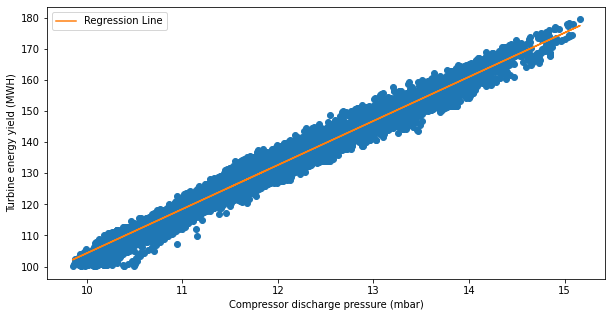

In [12]:
plt.figure(figsize=(10,5))

# Dataset
plt.plot(x,y,'o')

# Regression Line
plt.plot(x,y_hat, label = 'Regression Line')

# defining the label of the plot
plt.xlabel('Compressor discharge pressure (mbar)');plt.ylabel('Turbine energy yield (MWH)')
plt.legend()

### Check normality of the residuals

Text(0.5, 1.0, 'Standardized Residuals vs. Fits')

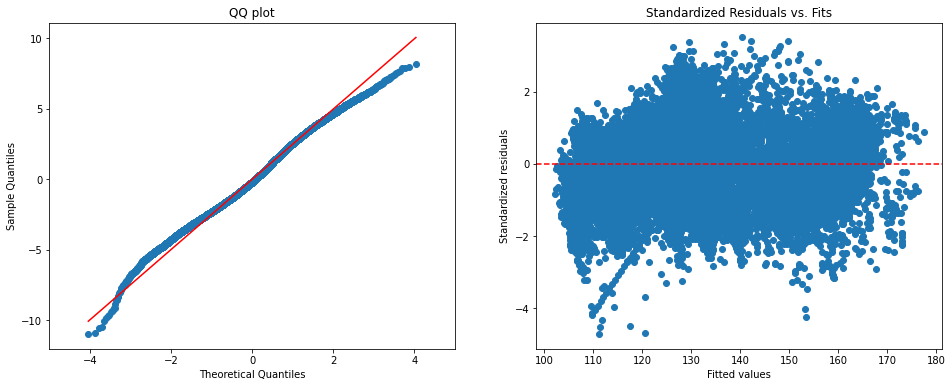

In [13]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
residuals = y - y_hat
degrees_of_freedom = len(x) - 2

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'QQ plot') 
axs[0].set_xlim(-5,5)


# Calculate the standardized residuals manually
mean_resid = np.mean(residuals)
std_resid = np.std(residuals, ddof=1)
std_resid = residuals / std_resid

# Create the plot
plt.scatter(y_hat, std_resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Standardized Residuals vs. Fits')

## Using the logarithmic transformation

b1: 1.2929793489525498 b0 1.6730576790944027 Nº coefs: 2


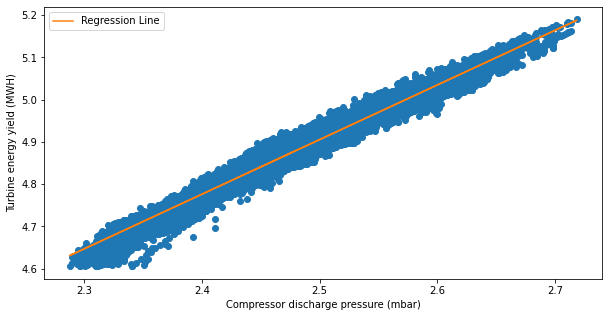

In [14]:
log_x = np.log(x)
log_y = np.log(y)

log_coef = np.polyfit(log_x,log_y,1); print('b1:',log_coef[0],'b0',log_coef[1],'Nº coefs:',len(log_coef))

log_y_hat = log_x*log_coef[0]+log_coef[1]

plt.figure(figsize=(10,5))
# Dataset
plt.plot(log_x,log_y,'o')

# Regression Line
plt.plot(log_x,log_y_hat, label = 'Regression Line')

# defining the label of the plot
plt.xlabel('Compressor discharge pressure (mbar)');plt.ylabel('Turbine energy yield (MWH)')
plt.legend()

### Note that we are estimating the logarithmic turbine energy yield using the logarithmic compressor discharge pressure. In order to obtain the "normal" variables values the regression equation is given by: 

$ e^{log(\hat{y})} =  e^{log(1.67 + 1.29x)}$

### Let's check the residuals 

Text(0.5, 1.0, 'Standardized Residuals vs. Fits')

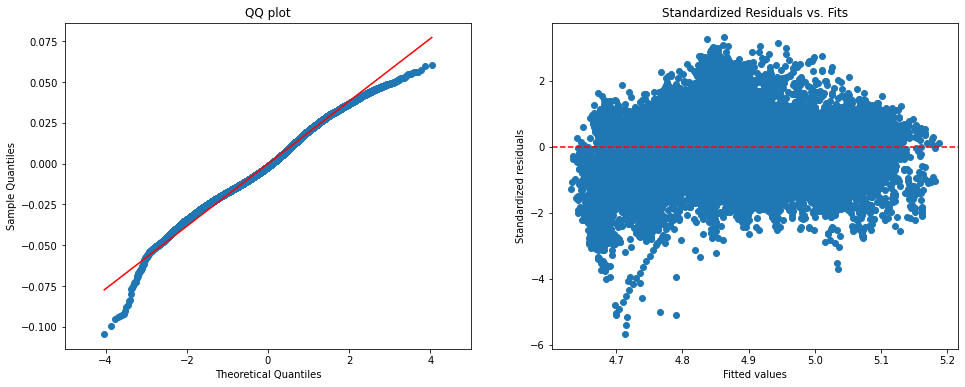

In [15]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
log_residuals = log_y - log_y_hat

sm.qqplot(log_residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'QQ plot') 
axs[0].set_xlim(-5,5)


# Calculate the standardized residuals manually
log_mean_resid = np.mean(log_residuals)
log_std_resid = np.std(log_residuals, ddof=1)
log_std_resid = log_residuals / log_std_resid

# Create the plot
plt.scatter(log_y_hat, log_std_resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Standardized Residuals vs. Fits')

In [19]:
### Comparar dois valores? 
### Exemplo regressão = e^log = real

### Now let's compare both models through the correlation and determinacy coefficients 

$r^2 = \frac{SSR}{SST} \ and \ r = sign(\beta_1) \sqrt{r^2}$ 

$SSR = \sum_{i=1}^{n} (\hat{y} - \overline{y})^2$

$SST = \sum_{i=1}^{n} (y - \overline{y})^2$

In [16]:
### Coeffiecients for the normal variables w/o log
print('Normal variables \n')
SSR = sum((y_hat-np.mean(y))**2); print('SSR:',SSR)

SST = sum((y-np.mean(y))**2); print('SST:',SST)

R2 = SSR/SST; R = np.sign(coef[0])*np.sqrt(R2); print(r'r^2:',np.round(R2*100,2),'%',r'r:',np.round(R*100,2),'%\n')

### Coeffiecients for the log variables
print('Log variables \n')
log_SSR = sum((log_y_hat-np.mean(log_y))**2); print('SSR:',SSR)

log_SST = sum((log_y-np.mean(log_y))**2); print('SST:',SST)

log_R2 = log_SSR/log_SST; log_R = np.sign(log_coef[0])*np.sqrt(log_R2); print(r'r^2:',np.round(log_R2*100,2),'%',r'r:',np.round(log_R*100,2),'%\n')



Normal variables 

SSR: 8760483.616160624
SST: 8960467.978567293
r^2: 97.77 % r: 98.88 %

Log variables 

SSR: 8760483.616160624
SST: 8960467.978567293
r^2: 97.57 % r: 98.78 %



### Let's test if there is any Linear Correlation between our variable and target
### Therefore, we will test the null hypothesis of:
$H_0: \beta_1 = 0, \ H_1: \beta_1 != 0$

the test is: 

$ t = \frac{b_1-\beta_1}{s_{b_1}}$

in this case, for testing non-linear relationship, $\beta_1 = 0$ and 

$ s_{b_1} = \frac{s}{\sqrt{\sum{x^2}-\frac{(\sum{x})^2}{n}}}$

$s = \sqrt{MSE}$

$MSE = \frac{SSE}{n-m-1}$

$SSE = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

In [17]:
SSE = sum((y-y_hat)**2); print('SSE:',SSE)

MSE = SSE/(len(x)-1-1); print('MSE:',MSE)

s = np.sqrt(MSE); print('s:',s)

sb1 = s/np.sqrt(sum(x**2)-sum(x)**2/len(x)); print('Sb1:',sb1)

t = (coef[0]-0)/sb1; print('T:',t)

pval = stats.t.sf(np.abs(t), degrees_of_freedom)*2; print('P-value:',pval)

SSE: 199984.36240667623
MSE: 5.444566235786563
s: 2.3333594313321218
Sb1: 0.011181835971651614
T: 1268.4764189760654
P-value: 0.0


In [19]:
log_SSE = sum((log_y-log_y_hat)**2); print('SSE:',log_SSE)

log_MSE = log_SSE/(len(log_x)-1-1); print('MSE:',log_MSE)

log_s = np.sqrt(log_MSE); print('s:',log_s)

log_sb1 = log_s/np.sqrt(sum(log_x**2)-sum(log_x)**2/len(log_x)); print('Sb1:',log_sb1)

log_t = (log_coef[0]-0)/log_sb1; print('T:',log_t)

log_pval = stats.t.sf(np.abs(log_t), degrees_of_freedom)*2; print('P-value:',log_pval)

SSE: 12.412993380140632
MSE: 0.0003379432463080404
s: 0.01838323274911245
Sb1: 0.0010657434653758623
T: 1213.2181814472087
P-value: 0.0


### After cheking the assumptions for the models, we can do inference. First, let's infere and find the confidence interval for the slope.

In [25]:
### Confidence interval for the slope under the normal variables for (95% confidence)
t_student_values = stats.t.ppf( [.025,.975], degrees_of_freedom)
ci_beta1 = coef[0]+(t_student_values*sb1); print('CI for Beta1',ci_beta1,'Beta0:',coef[0])

### Confidence interval for the slope under the log variables for (95% confidence)

log_ci_beta1 = log_coef[0]+(t_student_values*log_sb1); print('Log CI for Beta1',log_ci_beta1,'Beta0:',log_coef[0])

CI for Beta1 [14.16197853 14.20581197] Beta0: 14.183895250898392
Log CI for Beta1 [1.29089046 1.29506824] Beta0: 1.2929793489525498


### Confidence interval for the correlation coefficient 

In [29]:
### Confidence interval for the correlation coefficient under the normal variables for (95% confidence)

ci_corr = R + t_student_values*np.sqrt((1-R2)/(len(x)-2)); print('Correlation Coef. CI',ci_corr,'Correlation coef.',R)

### Confidence interval for the log correlation coefficient under the normal variables for (95% confidence)
log_ci_corr = log_R + t_student_values*np.sqrt((1-log_R2)/(len(log_x)-2)); print('Log Correlation Coef. CI',log_ci_corr,'Log Correlation coef.',log_R)

Correlation Coef. CI [0.98724993 0.99030561] Correlation coef. 0.9887777719924218
Log Correlation Coef. CI [0.98615558 0.98934713] Log Correlation coef. 0.9877513523888414


### Confidence interval for mean value of y given x

In [32]:
### Confidence interval for mean value of y given x under the normal variables for 95% confidence.

## let's chose the observation n= 13
idx = 13
y13 = y[idx-1]; x13 = x[idx-1]

y13_ci = y13 + t_student_values * s * np.sqrt(1/len(x) + (x13 - np.mean(x)**2)/np.sum((x-np.mean(x)**2)))
print('y13 mean interval',y13_ci, 'y13', y13)

### Confidence interval for mean value of y given x under the log normal variables for 95% confidence.

log_y13 = log_y[idx-1]; log_x13 = log_x[idx-1]

log_y13_ci = log_y13 + t_student_values * log_s * np.sqrt(1/len(log_x) + (log_x13 - np.mean(log_x)**2)/np.sum((log_x-np.mean(log_x)**2)))
print('log_y13 mean interval',log_y13_ci, 'log_y13', log_y13)

y13 mean interval [159.95637172 160.02362828] y13 159.99
log_y13 mean interval [5.07484812 5.07537451] log_y13 5.075111313280621


### Confidence interval for randomly chosen value of y given x

In [36]:
## let's chose the observation n= 13
idx = 13
y13_hat = y_hat[idx-1]; x13 = x[idx-1]

y13_ci_hat = y13_hat + t_student_values * s * np.sqrt(1 + 1/len(x) + (x13 - np.mean(x)**2)/np.sum((x-np.mean(x)**2)))
print('y13_hat prediction interval',y13_ci_hat, 'y13_hat', y13_hat)

### Confidence interval for mean value of y given x under the log normal variables for 95% confidence.

log_y13_hat = log_y_hat[idx-1]; log_x13 = log_x[idx-1]

log_y13_ci_hat = log_y13_hat + t_student_values * log_s * np.sqrt(1 + 1/len(log_x) + (log_x13 - np.mean(log_x)**2)/np.sum((log_x-np.mean(log_x)**2)))
print('log_y13_hat prediction interval',log_y13_ci_hat, 'log_y13_hat', log_y13_hat)

y13_hat prediction interval [155.43508032 164.58222989] y13_hat 160.00865510983078
log_y13_hat prediction interval [5.04269775 5.11476299] log_y13_hat 5.078730370826766


# PCA Analysis

### Data visualization of our data set 2D & 3D plots

In [98]:
#Selecting our subset of variables
cols = ['CDP','TIT','GTEP','AFDP','TAT','AT']
subset = raw_data[cols]

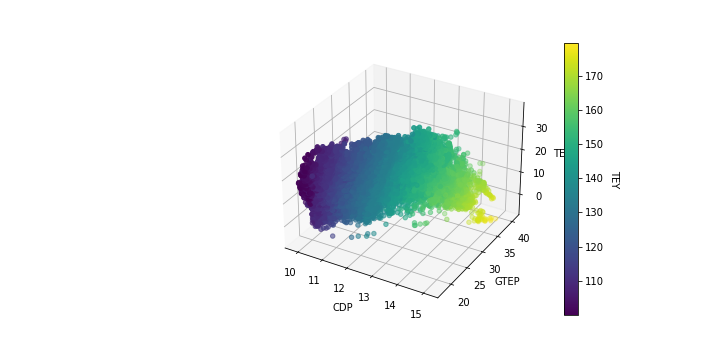

In [165]:
%matplotlib widget
fig = plt.figure(figsize=(10,5))

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points

scatter = ax.scatter3D(subset['CDP'], subset['GTEP'], subset['AT'], c=raw_data['TEY'], cmap='viridis')
ax.set_xlabel('CDP')
ax.set_ylabel('GTEP')
ax.set_zlabel('TEY')
colorbar = fig.colorbar(scatter)
colorbar.set_label('TEY', rotation=270, labelpad=15)
plt.show()

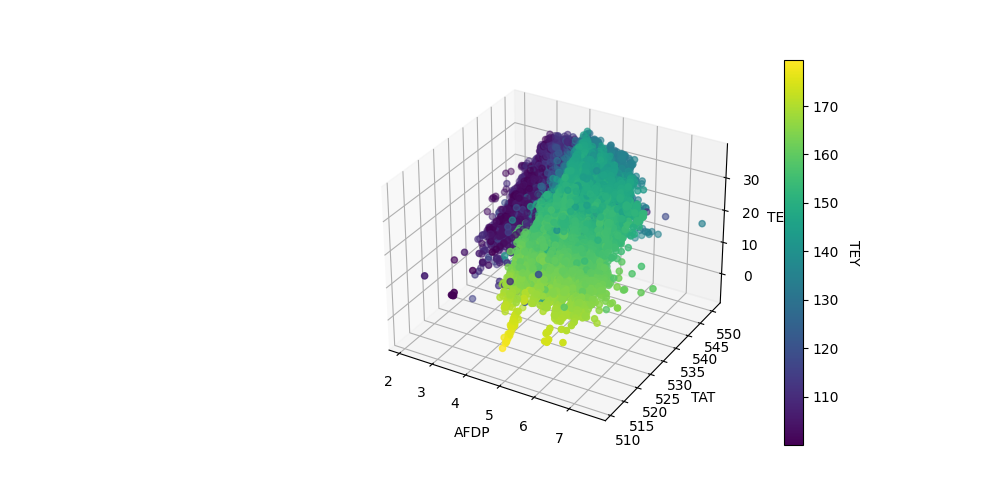

In [100]:
%matplotlib widget
fig = plt.figure(figsize=(10,5))

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points

scatter = ax.scatter3D(subset['AFDP'], subset['TAT'], subset['AT'], c=raw_data['TEY'], cmap='viridis')
ax.set_xlabel('AFDP')
ax.set_ylabel('TAT')
ax.set_zlabel('TEY')
colorbar = fig.colorbar(scatter)
colorbar.set_label('TEY', rotation=270, labelpad=15)
plt.show()

# Let's visualize our data again, but by applying data transformation, such as MaxMinRange and Standerdization

In [101]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_range = MinMaxScaler(); scaler_standard = StandardScaler()

range_data = scaler_range.fit_transform(subset); standard_data = scaler_standard.fit_transform(subset)

range_data = pd.DataFrame(range_data, columns=subset.columns); standard_data = pd.DataFrame(standard_data, columns=subset.columns)

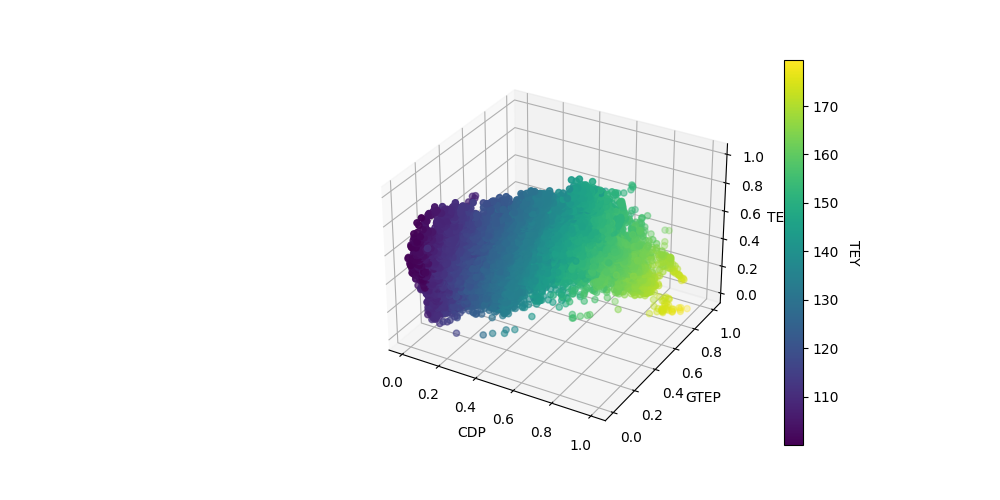

In [102]:
%matplotlib widget
fig = plt.figure(figsize=(10,5))

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points

scatter = ax.scatter3D(range_data['CDP'], range_data['GTEP'], range_data['AT'], c=raw_data['TEY'], cmap='viridis')
ax.set_xlabel('CDP')
ax.set_ylabel('GTEP')
ax.set_zlabel('TEY')
colorbar = fig.colorbar(scatter)
colorbar.set_label('TEY', rotation=270, labelpad=15)
plt.show()

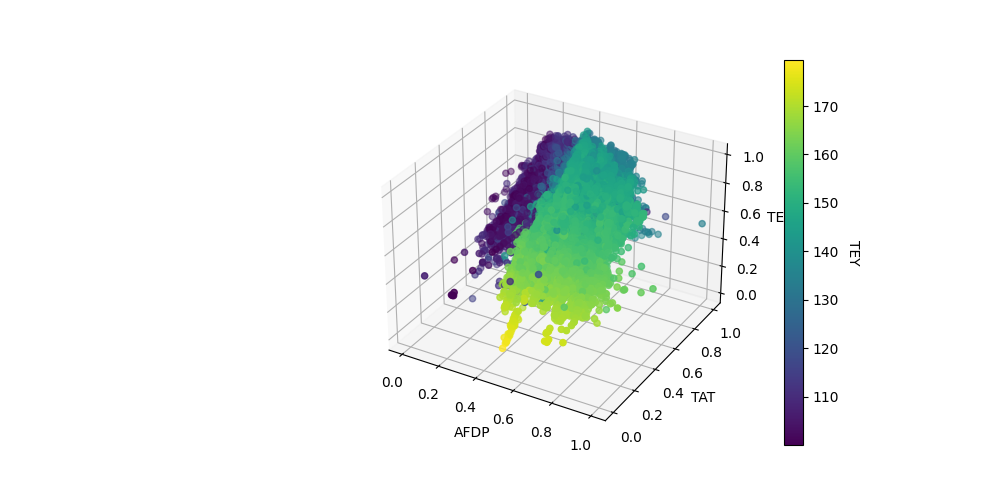

In [103]:
%matplotlib widget
fig = plt.figure(figsize=(10,5))

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points

scatter = ax.scatter3D(range_data['AFDP'], range_data['TAT'], range_data['AT'], c=raw_data['TEY'], cmap='viridis')
ax.set_xlabel('AFDP')
ax.set_ylabel('TAT')
ax.set_zlabel('TEY')
colorbar = fig.colorbar(scatter)
colorbar.set_label('TEY', rotation=270, labelpad=15)
plt.show()

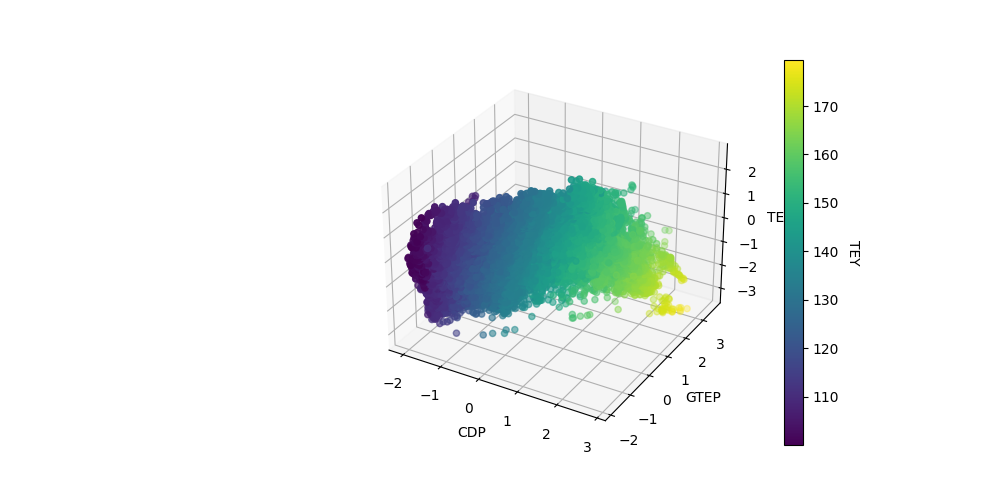

In [104]:
%matplotlib widget
fig = plt.figure(figsize=(10,5))

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points

scatter = ax.scatter3D(standard_data['CDP'], standard_data['GTEP'], standard_data['AT'], c=raw_data['TEY'], cmap='viridis')
ax.set_xlabel('CDP')
ax.set_ylabel('GTEP')
ax.set_zlabel('TEY')
colorbar = fig.colorbar(scatter)
colorbar.set_label('TEY', rotation=270, labelpad=15)
plt.show()

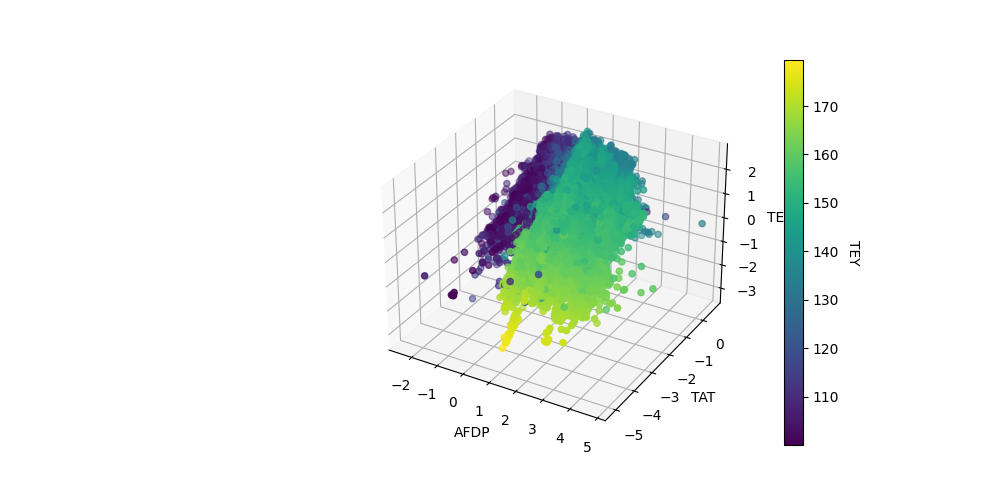

In [105]:
%matplotlib widget
fig = plt.figure(figsize=(10,5))

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points

scatter = ax.scatter3D(standard_data['AFDP'], standard_data['TAT'], standard_data['AT'], c=raw_data['TEY'], cmap='viridis')
ax.set_xlabel('AFDP')
ax.set_ylabel('TAT')
ax.set_zlabel('TEY')
colorbar = fig.colorbar(scatter)
colorbar.set_label('TEY', rotation=270, labelpad=15)

# PCA Analysis

In [122]:
### Different variances (big differences) and different metrics, we probably should apply standerization or range scaling
print(np.var(subset))

CDP       1.185443
TIT     307.516004
GTEP     17.605580
AFDP      0.598960
TAT      46.816622
AT       55.463020
dtype: float64


In [160]:
from sklearn.decomposition import PCA

pca = PCA()

pca_data = pca.fit_transform(standard_data)

In [161]:
def kaiser_criteria(explained_variance_ratio, percentage):
    
    total = 0
    percentage = percentage/100
    for i in range(len(explained_variance_ratio)):
        
        if total >= percentage:
            
            return total, i 
        
        else:

            total+=explained_variance_ratio[i]
    

def return_values_given_components(pca_values, components):

    return pca_values[:,:components]


In [162]:
total_variance_explained, components = kaiser_criteria(pca.explained_variance_ratio_,90)
print('Total variance explained:',np.round(total_variance_explained*100,2),'%', 'N.º of components:',components)

final_components = return_values_given_components(pca_data, components)


Total variance explained: 93.45 % N.º of components: 3


Text(0.5, 0, 'PC3')

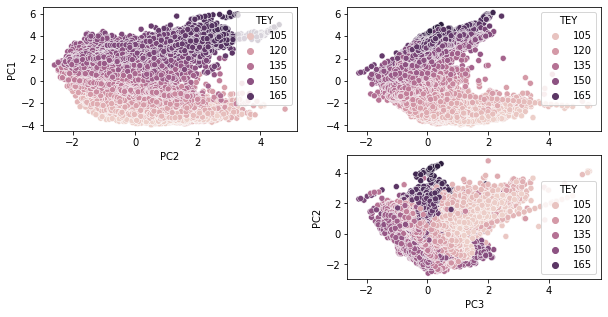

In [164]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.scatterplot(final_components[:,1], final_components[:,0], hue=raw_data['TEY'], cmap = 'viridis')
plt.ylabel('PC1'); plt.xlabel('PC2')
plt.subplot(2,2,2)
sns.scatterplot(final_components[:,2], final_components[:,0], hue=raw_data['TEY'], cmap = 'viridis')
plt.subplot(2,2,4)
sns.scatterplot(final_components[:,2], final_components[:,1], hue=raw_data['TEY'], cmap = 'viridis')
plt.ylabel('PC2'); plt.xlabel('PC3')